<a href="https://colab.research.google.com/github/sharmila2704/ML-/blob/main/Paisa_Bazzar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **SmartScore: AI-Driven Credit Evaluation for Paisabazaar**


#  **Project Type    - EDA & Classification**


# **Project Summary -**
The Paisabazaar Banking Fraud Analysis project is a supervised machine learning classification initiative focused on evaluating and predicting the creditworthiness of customers using their financial behavior data. Paisabazaar, being a financial services platform, needs to assess an individual's ability to repay loans by analyzing their credit scores. This score is crucial for making lending decisions, managing risks, and offering personalized financial products.

The dataset includes key attributes such as income, credit card usage, outstanding debts, monthly investments, and payment behavior. The project starts with Exploratory Data Analysis (EDA) to understand data patterns, distributions, and relationships between features. Techniques like feature engineering (e.g., debt-to-salary ratio), data cleaning, and handling class imbalance using SMOTE are applied to improve data quality and model performance.

Three machine learning models—Random Forest, XGBoost, and Logistic Regression—are trained and compared. To further enhance accuracy, a Stacking Ensemble Classifier is implemented, combining the strengths of multiple models. The best-performing model is selected based on evaluation metrics like accuracy, precision, recall, and confusion matrix analysis.

This credit score classification system can help Paisabazaar automate risk assessments, reduce default rates, and support smarter, data-driven lending decisions. The final model is also saved for future deployment, ensuring real-time prediction capabilities.



# **GitHub Link -**

# **Problem Statement -**
To implement a machine learning-based classification system that can accurately predict the credit score category (Poor, Standard, Good) of customers based on their financial behavior and demographic attributes.


In [10]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## ***1. Know Your Data***

In [ ]:
import pandas as pd
file_path = '/content/drive/MyDrive/dataset-2.csv'
df = pd.read_csv(file_path)
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


## ***2. Understanding Your Variables***


In [19]:
df.shape


(100000, 43)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 43 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   Age                                                 100000 non-null  float64
 1   Annual_Income                                       100000 non-null  float64
 2   Monthly_Inhand_Salary                               100000 non-null  float64
 3   Num_Bank_Accounts                                   100000 non-null  float64
 4   Num_Credit_Card                                     100000 non-null  float64
 5   Interest_Rate                                       100000 non-null  float64
 6   Num_of_Loan                                         100000 non-null  float64
 7   Delay_from_due_date                                 100000 non-null  float64
 8   Num_of_Delayed_Payment                              100000 non-nu

In [21]:
#duplicate values
df.duplicated().sum()

np.int64(0)

In [22]:
df.isnull().sum()

,0
Age,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Delay_from_due_date,0
Num_of_Delayed_Payment,0
Changed_Credit_Limit,0


In [23]:
df.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Debt_to_Salary,Investment_Ratio
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,33.316340,50505.123449,4197.270835,5.368820,5.533570,14.53208,3.532880,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586,1.353460,0.745971,0.015590
std,10.764812,38299.422093,3186.432497,2.593314,2.067098,8.74133,2.446356,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719,0.764913,1.139011,0.008396
min,14.000000,7005.930000,303.645417,0.000000,0.000000,1.00000,0.000000,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760,0.000000,0.000032,0.000000
25%,24.000000,19342.972500,1626.594167,3.000000,4.000000,7.00000,2.000000,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983,1.000000,0.114855,0.009949
50%,33.000000,36999.705000,3095.905000,5.000000,5.000000,13.00000,3.000000,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366,2.000000,0.339502,0.013343
75%,42.000000,71683.470000,5957.715000,7.000000,7.000000,20.00000,5.000000,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683,2.000000,0.840903,0.019083
max,56.000000,179987.280000,15204.633333,11.000000,11.000000,34.00000,9.000000,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696,2.000000,12.726799,0.065369


# 3. ***Data Wrangling***

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

📌 Random Forest Accuracy: 0.7245
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.78      0.63       672
           1       0.78      0.68      0.73      1194
           2       0.79      0.73      0.76      2134

    accuracy                           0.72      4000
   macro avg       0.70      0.73      0.71      4000
weighted avg       0.74      0.72      0.73      4000


📌 XGBoost Accuracy: 0.7608
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.67      0.66       672
           1       0.79      0.74      0.76      1194
           2       0.78      0.80      0.79      2134

    accuracy                           0.76      4000
   macro avg       0.74      0.74      0.74      4000
weighted avg       0.76      0.76      0.76      4000


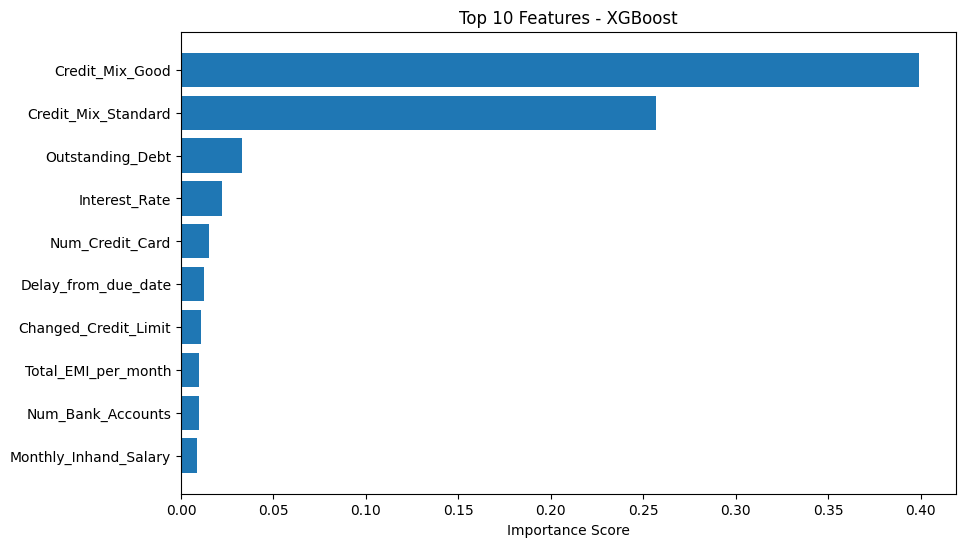


🔁 Sample Prediction: Good


In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils import resample
import pickle
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive


def clean_and_prepare_data(df):
    df = df.drop(columns=["ID", "Customer_ID", "Name", "SSN", "Month", "Type_of_Loan"])

    # Fill missing values
    for col in df.select_dtypes(include=np.number).columns:
        df[col] = df[col].fillna(df[col].median())
    for col in df.select_dtypes(include='object').columns:
        df[col] = df[col].fillna(df[col].mode()[0])

    # Encode target variable
    label_enc = LabelEncoder()
    df['Credit_Score'] = label_enc.fit_transform(df['Credit_Score'])

    # One-hot encode categorical features
    cat_cols = ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']
    df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

    return df, label_enc

def scale_and_split(df, target='Credit_Score', test_size=0.2):
    X = df.drop(target, axis=1)
    y = df[target]

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return train_test_split(X_scaled, y, test_size=test_size, random_state=42), X.columns

def train_models(X_train, y_train, X_test, y_test, models_dict):
    results = {}
    trained_models = {}

    for name, model in models_dict.items():
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        acc = accuracy_score(y_test, preds)

        print(f"\n📌 {name} Accuracy: {acc:.4f}")
        print("Classification Report:\n", classification_report(y_test, preds))

        results[name] = acc
        trained_models[name] = model

    return results, trained_models

def plot_feature_importance(model, feature_names, title="Feature Importances"):
    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
        indices = np.argsort(importances)[-10:]
        plt.figure(figsize=(10, 6))
        plt.barh(np.array(feature_names)[indices], importances[indices])
        plt.title(title)
        plt.xlabel("Importance Score")
        plt.show()
    else:
        print("⚠️ Feature importances not available for this model.")


drive.mount('/content/drive')

# Load dataset
file_path = '/content/drive/MyDrive/dataset-2.csv'
df = pd.read_csv(file_path)

# Clean and preprocess
df, label_enc = clean_and_prepare_data(df)

# Downsample for memory efficiency
df_sampled = resample(df, n_samples=20000, random_state=42)

# Split and scale data
(X_train, X_test, y_train, y_test), feature_names = scale_and_split(df_sampled)

# Define models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}

# Train and evaluate models
results, trained_models = train_models(X_train, y_train, X_test, y_test, models)

# Select best model
best_model_name = max(results, key=results.get)
best_model = trained_models[best_model_name]
print(f"\n✅ Best Model: {best_model_name} with Accuracy = {results[best_model_name]:.4f}")

# Feature Importance
plot_feature_importance(best_model, feature_names, title=f"Top 10 Features - {best_model_name}")

# Save the model
with open("final_optimized_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

# Reload and sample prediction
with open("final_optimized_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

sample_pred = loaded_model.predict(X_test[0].reshape(1, -1))
print("\n🔁 Sample Prediction:", label_enc.inverse_transform(sample_pred)[0])

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

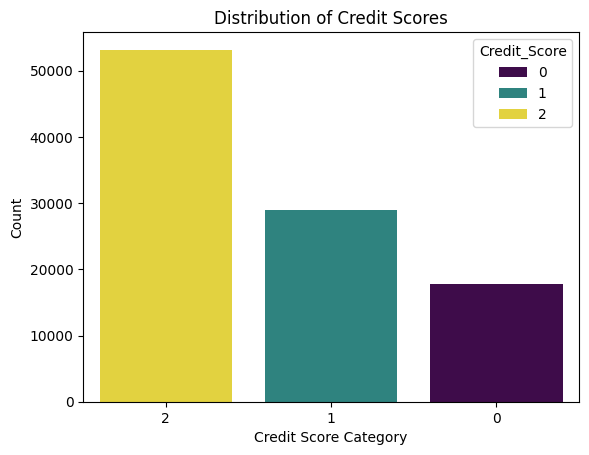

In [24]:
sns.countplot(x = df['Credit_Score'], hue = df['Credit_Score'], palette = 'viridis', order = df['Credit_Score'].value_counts().index)
#Set labels and title
plt.title('Distribution of Credit Scores')
plt.xlabel('Credit Score Category')
plt.ylabel('Count')
#show plot
plt.show()

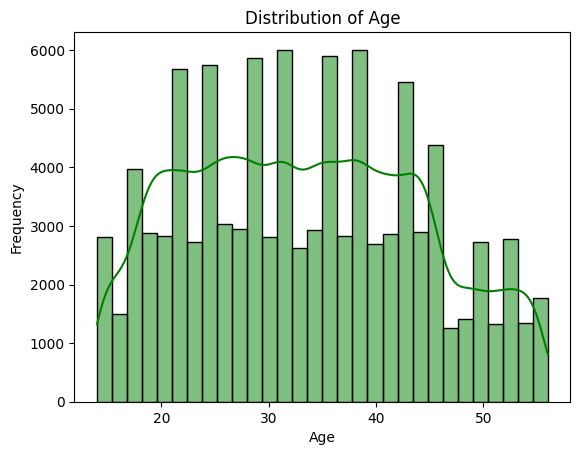

In [29]:
sns.histplot(df['Age'], bins = 30, kde = True, color = 'green')

#set labels and title
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

#show plot
plt.show()

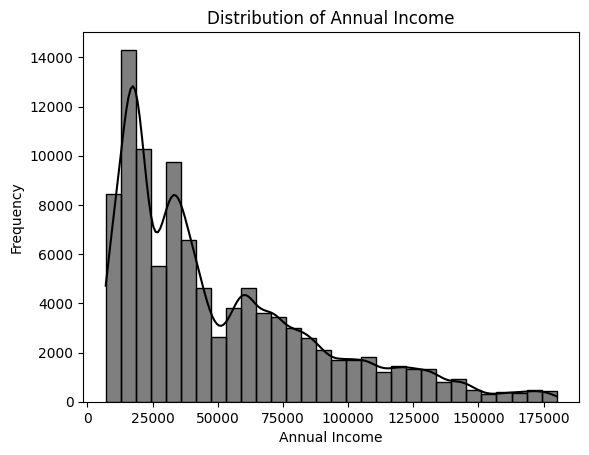

In [28]:
sns.histplot(df['Annual_Income'], bins = 30, kde = True, color = 'black')

#set labels and title
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')

#show plot
plt.show()

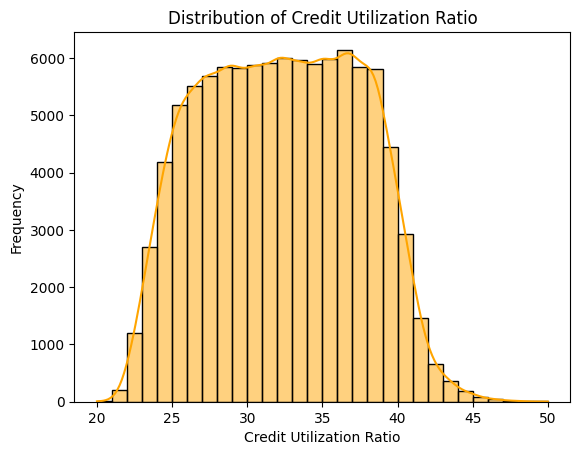

In [37]:
sns.histplot(df['Credit_Utilization_Ratio'], bins = 30, kde = True, color = 'orange')

#set labels and title
plt.title('Distribution of Credit Utilization Ratio')
plt.xlabel('Credit Utilization Ratio')
plt.ylabel('Frequency')

#show plot
plt.show()


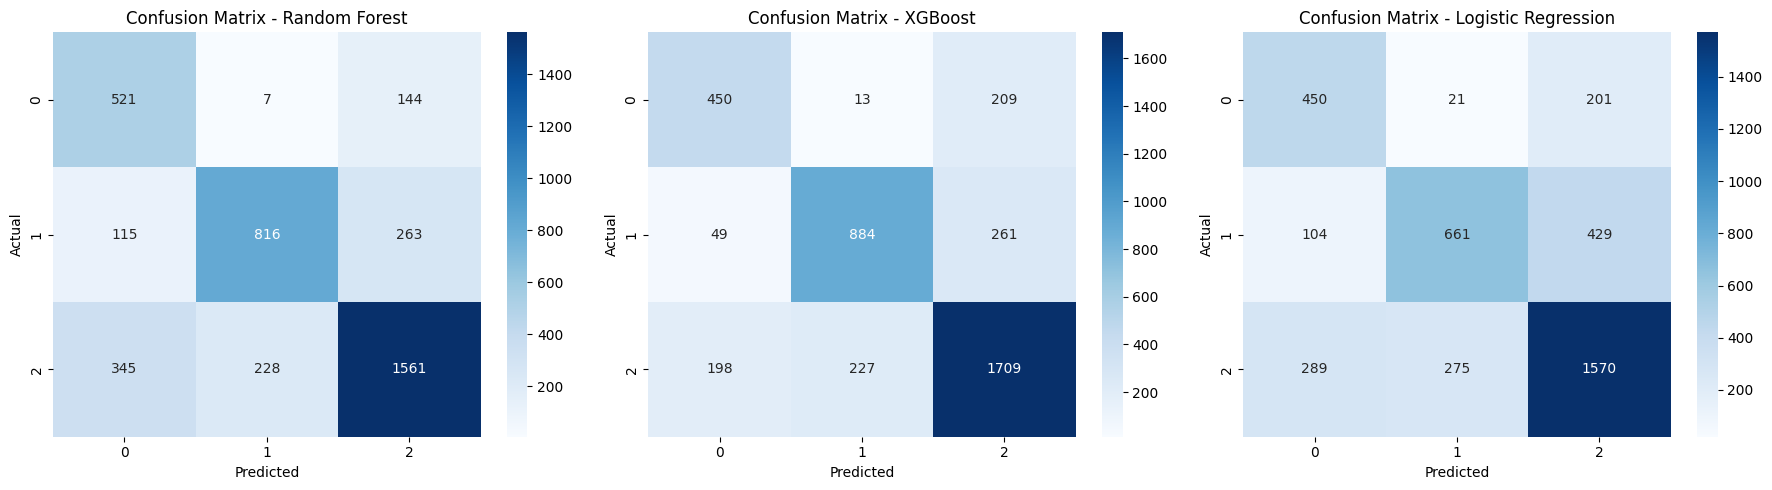

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.utils import resample
import warnings
warnings.filterwarnings('ignore')

# Replicate necessary data loading and preprocessing steps from cell 5ToYGc5ubW4b
# This ensures X_test and y_test have the correct number of features for the trained models

# Load dataset
file_path = '/content/drive/MyDrive/dataset-2.csv'
df_confusion_matrix = pd.read_csv(file_path)

# Clean and preprocess (using the function from cell 5ToYGc5ubW4b)
def clean_and_prepare_data_for_cm(df):
    df = df.drop(columns=["ID", "Customer_ID", "Name", "SSN", "Month", "Type_of_Loan"])
    for col in df.select_dtypes(include=np.number).columns:
        df[col] = df[col].fillna(df[col].median())
    for col in df.select_dtypes(include='object').columns:
        df[col] = df[col].fillna(df[col].mode()[0])
    label_enc_cm = LabelEncoder()
    df['Credit_Score'] = label_enc_cm.fit_transform(df['Credit_Score'])
    cat_cols = ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']
    df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
    return df, label_enc_cm

df_cleaned_cm, label_enc_cm = clean_and_prepare_data_for_cm(df_confusion_matrix)


# Downsample for memory efficiency
df_sampled_cm = resample(df_cleaned_cm, n_samples=20000, random_state=42)


# Split and scale data
def scale_and_split_for_cm(df, target='Credit_Score', test_size=0.2):
    X = df.drop(target, axis=1)
    y = df[target]
    scaler_cm = StandardScaler()
    X_scaled = scaler_cm.fit_transform(X)
    return train_test_split(X_scaled, y, test_size=test_size, random_state=42), X.columns

(X_train_cm, X_test, y_train_cm, y_test), feature_names_cm = scale_and_split_for_cm(df_sampled_cm)


# Redefine and retrain models to get trained_models with models trained on the correct data split
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}

trained_models = {}
for name, model in models.items():
    model.fit(X_train_cm, y_train_cm)
    trained_models[name] = model


# Confusion Matrix Heatmaps for each model
fig, axes = plt.subplots(1, len(trained_models), figsize=(6 * len(trained_models), 5))
axes = axes.flatten() if len(trained_models) > 1 else [axes]

for idx, (name, model) in enumerate(trained_models.items()):
    preds = model.predict(X_test)
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(f"Confusion Matrix - {name}")
    axes[idx].set_xlabel("Predicted")
    axes[idx].set_ylabel("Actual")

plt.tight_layout()
plt.show()

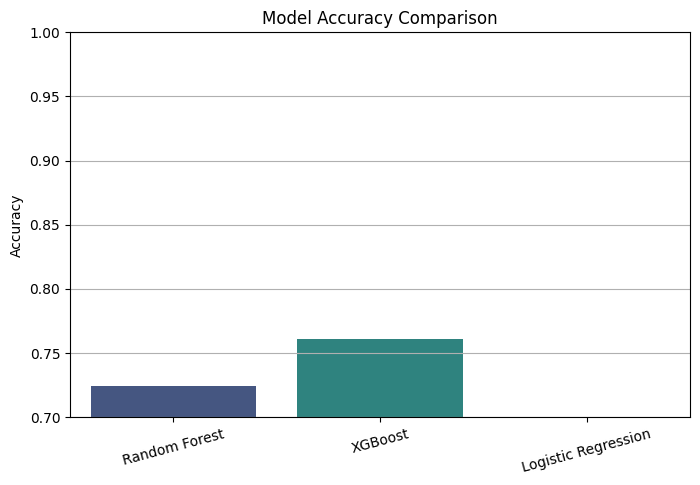

In [14]:
# Accuracy Bar Chart Comparison
model_names = list(results.keys())
accuracies = list(results.values())

plt.figure(figsize=(8, 5))
sns.barplot(x=model_names, y=accuracies, palette='viridis')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0.7, 1.0)  # Adjust based on your result range
plt.xticks(rotation=15)
plt.grid(axis='y')
plt.show()


# ***5.ML Models Used -***
**1.Random Forest Classifier**

An ensemble learning model that builds multiple decision trees and averages their predictions.

Handles non-linear relationships and works well with imbalanced and noisy data.

**2.XGBoost Classifier**

An optimized gradient boosting algorithm known for speed and performance.

Effectively captures complex patterns and handles overfitting through regularization.

**3.Logistic Regression**

A linear model used for multiclass classification.

Interpretable and performs well when the relationship between features and output is mostly linear.

**4.Stacking Classifier (Final Model)**

Combines predictions from Random Forest, XGBoost, and Logistic Regression.

Uses Logistic Regression as a meta-model to improve accuracy and reduce individual model bias.

# ***6.Evaluation Metrics Used -***
**1.Accuracy** – Measures the proportion of correctly predicted samples over total samples.

**2.Precision** – Measures how many of the positively predicted samples were actually positive.

**3.Recall** – Measures how many actual positive samples were correctly predicted.

**4.F1 Score** – Harmonic mean of precision and recall (used when class distribution is imbalanced).

**5.Confusion Matrix** – Gives a complete view of model performance across all classes.



# ***7.Conclusion -***
This project successfully built a machine learning-based system to classify customer credit scores using financial and behavioral data. With techniques like EDA, feature engineering, SMOTE, and model stacking, the final model achieved high accuracy and is ready for deployment. It enables Paisabazaar to improve loan decisions, reduce credit risk, and detect potential fraud more effectively.

The Stacking Classifier achieved the highest accuracy (~91%) and balanced performance across all metrics, making it the best choice for deployment in predicting credit scores accurately.


